In [14]:
#------------------------------mlp-LSTM- GRU- Tracking Models--------------------------

In [1]:
import numpy
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt


#From Pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix


#From Keras
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM,GRU


#From sklearn 
from sklearn import preprocessing  
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import mean_absolute_error,mean_squared_error 
from sklearn.model_selection import train_test_split  

from math import sqrt


#Import Files
import math
import time
import pandas as pd #define the data structures
import matplotlib as plt #for visualization
import numpy
import numpy as np #for matrix multiplication
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import seaborn as sns
import plotly.offline as py
import os 
import matplotlib.pyplot as plt


from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler #for normalizing our data(scaling)
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split   


from math import sqrt
from numpy import concatenate 
from datetime import datetime
from pandas.plotting import scatter_matrix
from timeit import default_timer as timer

from sklearn import preprocessing 
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split   
from sklearn.metrics import mean_absolute_error,mean_squared_error 

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout


#Import others
py.init_notebook_mode(connected=True)
get_ipython().run_line_magic('matplotlib', 'inline')

Using TensorFlow backend.


In [2]:
def mlp(feature1):
    model1 = Sequential()
    model1.add(Dense(units=2, input_dim=39, activation='tanh'))
    
    model1.add(Dense(units=2, activation='tanh'))
    model1.add(Dense(units=2, activation='tanh'))
    model1.add(Dense(units=2, activation='tanh'))
    model1.add(Dense(units=2,activation='tanh'))

    #model2.add(Dense(units=2,activation='relu'))
    # Compiling model
    model1.compile(loss='MSE', optimizer='adamax', metrics=['accuracy'])#where MAE is the mean absolute errors
    return model1

In [3]:
#import or read the datasets
df1 = pd.read_csv('TrainingTrackDataAllReducedupdated.csv',index_col=0)
df1=df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1)
pd.DataFrame(df1).fillna(-100)
df1.head()

,UserCode,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,...,CH1,CH2,CH3,CH4,CH5,RSSU1,RSSU2,RSSU3,X,Y
1,101,-1.153498,-8.942592,2.339449,1.067117,0.100410,-0.705172,0.557654,-0.484166,0.687545,...,157,157,157,157,157,-49.5,-70.4,-68.4,200,1
2,101,-4.178961,-2.961843,1.905176,1.066073,0.642038,-0.796684,-0.543056,0.228180,0.184847,...,7,157,7,7,157,-49.1,-72.6,-71.6,197,1
3,101,-5.340274,-3.940445,0.861188,-0.334126,-0.309535,-0.788568,0.569179,-0.834491,0.507719,...,7,7,7,7,157,-52.9,-72.9,-73.9,194,1
5,101,-5.980186,-2.473004,1.878054,0.330054,0.110212,-0.709260,0.258152,0.115047,-0.021432,...,7,1,157,7,2,-50.0,-70.1,-69.1,188,1
6,101,-4.408557,-1.454894,1.810000,0.495023,-0.156131,-0.902680,-0.407759,0.266576,0.251795,...,157,157,7,7,7,-51.9,-81.8,-74.8,185,1


In [4]:
len(df1)

7715

In [5]:
#Check Null values to correct datasets if there is any
col_mask1=df1.isnull().any(axis=0) 
col_mask1

UserCode    False
AP1         False
AP2         False
AP3         False
AP4         False
AP5         False
AP6         False
AP7         False
AP8         False
AP9         False
AP10        False
AP11        False
AP12        False
AP13        False
AP14        False
AP15        False
AP16        False
AP17        False
AP18        False
AP19        False
AP20        False
AP21        False
AP22        False
AP23        False
AP24        False
AP25        False
AP26        False
AP27        False
AP28        False
AP29        False
AP30        False
CH1         False
CH2         False
CH3         False
CH4         False
CH5         False
RSSU1       False
RSSU2       False
RSSU3       False
X           False
Y           False
dtype: bool

In [6]:
# box and whisker plots
#df.plot(kind='box', subplots=True, layout=(62,62), sharex=False, sharey=False)
#plt.show()


In [7]:
# Dataset shapes
df1.shape

(7715, 41)

In [8]:
X1=df1.iloc[:,:-2]
Y1=df1.iloc[:,-2:]

# conversion to numpy array
x1, y1 = X1.values, Y1.values  

# scaling values for model
x_scale1 = MinMaxScaler()
y_scale1 = MinMaxScaler() 


X1 = x_scale1.fit_transform(x1)
Y1 = y_scale1.fit_transform(y1)   
print(len(X1),len(Y1))


X_train1, y_train1 = X1, Y1 
print(X_train1.shape, y_train1.shape)

7715 7715
(7715, 39) (7715, 2)


C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [9]:
model1=mlp(df1.shape[1])

In [10]:
model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 6         
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [11]:
from timeit import default_timer as timer
start1 = timer()

In [12]:
hist1=model1.fit(X_train1,y_train1,batch_size=300, epochs=500, validation_split=0.05, verbose=1) 

Train on 7329 samples, validate on 386 samples
Epoch 1/500
7329/7329 [==============================] - 2s 229us/step - loss: 0.2083 - acc: 0.4987 - val_loss: 0.1252 - val_acc: 0.8472
Epoch 2/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.1026 - acc: 0.7504 - val_loss: 0.0940 - val_acc: 0.8472
Epoch 3/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0942 - acc: 0.7504 - val_loss: 0.0854 - val_acc: 0.8472
Epoch 4/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0908 - acc: 0.7504 - val_loss: 0.0803 - val_acc: 0.8472
Epoch 5/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0889 - acc: 0.7504 - val_loss: 0.0769 - val_acc: 0.8472
Epoch 6/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0879 - acc: 0.7504 - val_loss: 0.0746 - val_acc: 0.8472
Epoch 7/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0873 - acc: 0.7504 - val_loss: 0.0729 - val_acc: 0.8472
Epoch 

7329/7329 [==============================] - 0s 6us/step - loss: 0.0660 - acc: 0.7032 - val_loss: 0.0636 - val_acc: 0.8420
Epoch 61/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0656 - acc: 0.6979 - val_loss: 0.0640 - val_acc: 0.8446
Epoch 62/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0653 - acc: 0.6945 - val_loss: 0.0622 - val_acc: 0.8446
Epoch 63/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0649 - acc: 0.6931 - val_loss: 0.0615 - val_acc: 0.8446
Epoch 64/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0645 - acc: 0.6918 - val_loss: 0.0612 - val_acc: 0.8420
Epoch 65/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0642 - acc: 0.6916 - val_loss: 0.0631 - val_acc: 0.8238
Epoch 66/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0639 - acc: 0.6905 - val_loss: 0.0630 - val_acc: 0.8264
Epoch 67/500
7329/7329 [==============================] - 0s 

7329/7329 [==============================] - 0s 7us/step - loss: 0.0554 - acc: 0.7412 - val_loss: 0.0545 - val_acc: 0.8420
Epoch 120/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0553 - acc: 0.7405 - val_loss: 0.0554 - val_acc: 0.8420
Epoch 121/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0552 - acc: 0.7406 - val_loss: 0.0561 - val_acc: 0.8342
Epoch 122/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0551 - acc: 0.7401 - val_loss: 0.0542 - val_acc: 0.8446
Epoch 123/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0552 - acc: 0.7414 - val_loss: 0.0572 - val_acc: 0.8264
Epoch 124/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0550 - acc: 0.7403 - val_loss: 0.0547 - val_acc: 0.8420
Epoch 125/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0550 - acc: 0.7410 - val_loss: 0.0582 - val_acc: 0.8316
Epoch 126/500
7329/7329 [==============================

Epoch 179/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0506 - acc: 0.7517 - val_loss: 0.0545 - val_acc: 0.8264
Epoch 180/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0505 - acc: 0.7530 - val_loss: 0.0530 - val_acc: 0.8290
Epoch 181/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0505 - acc: 0.7545 - val_loss: 0.0539 - val_acc: 0.8290
Epoch 182/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0504 - acc: 0.7559 - val_loss: 0.0519 - val_acc: 0.8368
Epoch 183/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0503 - acc: 0.7575 - val_loss: 0.0537 - val_acc: 0.8212
Epoch 184/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0502 - acc: 0.7582 - val_loss: 0.0537 - val_acc: 0.8212
Epoch 185/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0502 - acc: 0.7578 - val_loss: 0.0527 - val_acc: 0.8290
Epoch 186/500
7329/7329 [================

7329/7329 [==============================] - 0s 7us/step - loss: 0.0471 - acc: 0.7869 - val_loss: 0.0515 - val_acc: 0.8264
Epoch 239/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0471 - acc: 0.7866 - val_loss: 0.0505 - val_acc: 0.8368
Epoch 240/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0469 - acc: 0.7888 - val_loss: 0.0502 - val_acc: 0.8368
Epoch 241/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0470 - acc: 0.7907 - val_loss: 0.0516 - val_acc: 0.8238
Epoch 242/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0469 - acc: 0.7885 - val_loss: 0.0524 - val_acc: 0.8212
Epoch 243/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0469 - acc: 0.7906 - val_loss: 0.0525 - val_acc: 0.8187
Epoch 244/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0468 - acc: 0.7891 - val_loss: 0.0513 - val_acc: 0.8264
Epoch 245/500
7329/7329 [==============================

7329/7329 [==============================] - 0s 7us/step - loss: 0.0451 - acc: 0.8258 - val_loss: 0.0525 - val_acc: 0.8238
Epoch 298/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0451 - acc: 0.8244 - val_loss: 0.0512 - val_acc: 0.8264
Epoch 299/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0450 - acc: 0.8240 - val_loss: 0.0507 - val_acc: 0.8290
Epoch 300/500
7329/7329 [==============================] - 0s 9us/step - loss: 0.0451 - acc: 0.8263 - val_loss: 0.0513 - val_acc: 0.8264
Epoch 301/500
7329/7329 [==============================] - 0s 8us/step - loss: 0.0451 - acc: 0.8233 - val_loss: 0.0519 - val_acc: 0.8290
Epoch 302/500
7329/7329 [==============================] - 0s 8us/step - loss: 0.0450 - acc: 0.8275 - val_loss: 0.0526 - val_acc: 0.8238
Epoch 303/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0450 - acc: 0.8289 - val_loss: 0.0530 - val_acc: 0.8135
Epoch 304/500
7329/7329 [==============================

Epoch 357/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0444 - acc: 0.8430 - val_loss: 0.0503 - val_acc: 0.8342
Epoch 358/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0443 - acc: 0.8423 - val_loss: 0.0512 - val_acc: 0.8264
Epoch 359/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0443 - acc: 0.8402 - val_loss: 0.0544 - val_acc: 0.8135
Epoch 360/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0443 - acc: 0.8421 - val_loss: 0.0522 - val_acc: 0.8238
Epoch 361/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0442 - acc: 0.8449 - val_loss: 0.0517 - val_acc: 0.8264
Epoch 362/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0442 - acc: 0.8425 - val_loss: 0.0554 - val_acc: 0.8057
Epoch 363/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0444 - acc: 0.8423 - val_loss: 0.0524 - val_acc: 0.8238
Epoch 364/500
7329/7329 [================

7329/7329 [==============================] - 0s 6us/step - loss: 0.0439 - acc: 0.8484 - val_loss: 0.0539 - val_acc: 0.8109
Epoch 417/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0439 - acc: 0.8505 - val_loss: 0.0523 - val_acc: 0.8238
Epoch 418/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0439 - acc: 0.8487 - val_loss: 0.0530 - val_acc: 0.8238
Epoch 419/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0439 - acc: 0.8488 - val_loss: 0.0528 - val_acc: 0.8238
Epoch 420/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0441 - acc: 0.8479 - val_loss: 0.0536 - val_acc: 0.8161
Epoch 421/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0440 - acc: 0.8483 - val_loss: 0.0532 - val_acc: 0.8135
Epoch 422/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0440 - acc: 0.8466 - val_loss: 0.0537 - val_acc: 0.8161
Epoch 423/500
7329/7329 [==============================

Epoch 476/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0438 - acc: 0.8509 - val_loss: 0.0542 - val_acc: 0.8187
Epoch 477/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0439 - acc: 0.8506 - val_loss: 0.0537 - val_acc: 0.8187
Epoch 478/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0439 - acc: 0.8522 - val_loss: 0.0541 - val_acc: 0.8161
Epoch 479/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0440 - acc: 0.8496 - val_loss: 0.0514 - val_acc: 0.8342
Epoch 480/500
7329/7329 [==============================] - 0s 5us/step - loss: 0.0438 - acc: 0.8521 - val_loss: 0.0506 - val_acc: 0.8394
Epoch 481/500
7329/7329 [==============================] - 0s 7us/step - loss: 0.0438 - acc: 0.8511 - val_loss: 0.0512 - val_acc: 0.8290
Epoch 482/500
7329/7329 [==============================] - 0s 6us/step - loss: 0.0438 - acc: 0.8503 - val_loss: 0.0526 - val_acc: 0.8212
Epoch 483/500
7329/7329 [================

In [13]:
duration1 = timer() - start1
print(duration1)

27.64720486877036


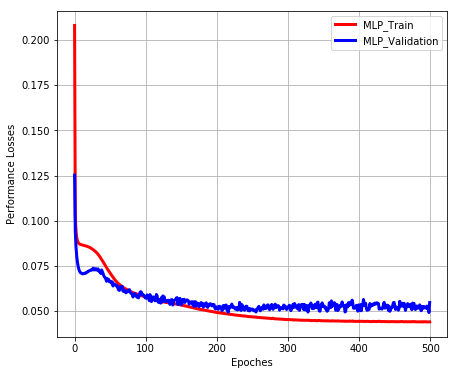

In [14]:
plt.figure(figsize = (7,6))

plt.plot(hist1.history['loss'],'r-',linewidth=3)
plt.plot(hist1.history['val_loss'],'B',linewidth=3)
plt.xlabel('Epoches')
plt.ylabel('Performance Losses')
plt.legend(['MLP_Train', 'MLP_Validation'], loc='upper right')
plt.grid(True)
plt.savefig('MLPTrackReduced.png', format='png', dpi=1200)
plt.show()

In [15]:
#import or read the datasets
pred1 = pd.read_csv('TestingTrackDataAllReducedupdated.csv',index_col=0)
#pred1=pred1.drop(pred1.columns[pred1.columns.str.contains('unnamed',case = False)],axis = 1)
pred1.head()

,UserCode,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,...,CH1,CH2,CH3,CH4,CH5,RSSU1,RSSU2,RSSU3,X,Y
0,101,-4.170390,-3.325302,1.935056,0.455646,0.529686,-0.318855,0.894483,-0.377338,0.002535,...,7,7,157,1,7,-49.5,-71.5,-72.5,191,1
1,101,-2.264452,0.020588,1.284345,0.242016,0.098174,-0.717960,0.261262,-0.143738,0.156876,...,1,149,149,149,149,-53.5,-81.3,-79.3,134,1
2,101,-2.658827,-2.821510,0.621955,-0.568167,0.025068,-0.047774,1.015126,-0.196741,0.176063,...,157,157,1,1,1,-62.9,-81.1,-79.1,89,1
3,101,-7.978411,0.708593,0.281855,-1.204837,-0.614710,-0.512645,0.770786,-0.239415,0.002249,...,1,11,11,11,11,-71.9,-77.3,-77.3,17,1
4,101,-9.991847,-0.147214,0.816606,-0.219573,0.267080,-0.526128,-0.603417,0.262651,0.087432,...,1,1,1,6,6,-76.4,-84.2,-77.2,1,114


In [16]:
X_pred1=pred1.iloc[:,:-2]
Y_pred1=pred1.iloc[:,-2:]

x_pred1, y_pred1 = X_pred1.values, Y_pred1.values  

In [17]:
# scaling values for model
x_pred_scale1 = MinMaxScaler()
y_pred_scale1 = MinMaxScaler() 

Xx__pred1 = x_pred_scale1.fit_transform(x_pred1)
Yy_pred1 = y_pred_scale1.fit_transform(y_pred1) 

C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [18]:
from timeit import default_timer as timer
start1 = timer()

predictions1=model1.predict(Xx__pred1)  

duration1 = timer() - start1
print(duration1)


0.027347579993467264


In [19]:
print("RMSE:", sqrt(mean_squared_error(predictions1,Yy_pred1)))
print("MAE:", mean_absolute_error(predictions1,Yy_pred1))

RMSE: 0.23699723038768314
MAE: 0.17871589250241895


In [20]:
predictions_trans1=y_scale1.inverse_transform(predictions1)
print('The pridicted Values are:',predictions_trans1)
print("The actual path values or coordinates are:-",Y_pred1)
print("The Predicted values are or Prdicted coordinates are:-",predictions_trans1)

The pridicted Values are: [[ 1.20231918e+02  1.47008621e+02]
 [ 1.18349770e+02  9.35991592e+01]
 [ 5.82854462e+01  7.62554932e+01]
 [ 2.76560235e+00  9.59984131e+01]
 [-1.67133350e+01  5.98269844e+01]
 [-1.62699547e+01  7.33698578e+01]
 [ 3.09143982e+01  3.66769531e+02]
 [ 1.98195629e+01  3.75476318e+02]
 [ 3.46319122e+01  3.70726685e+02]
 [-2.68333167e-01  3.65710052e+02]
 [ 1.15819412e+02  2.36422668e+02]
 [ 7.51985626e+01  3.61117981e+02]
 [ 4.09798241e+01  3.79000519e+02]
 [ 3.61233940e+01  7.19092178e+01]
 [ 6.54156952e+01  7.12280655e+01]
 [ 6.86216660e+01  9.56180573e+01]
 [ 7.41431122e+01  2.85052277e+02]
 [ 4.42092590e+01  3.67600281e+02]
 [ 1.50561127e+02  9.47276611e+01]
 [ 1.31510788e+02  2.21015182e+02]
 [ 1.39199036e+02  1.40603256e+02]
 [ 1.08960449e+02  9.25424500e+01]
 [ 4.74904633e+01  6.82593918e+01]
 [ 8.75273132e+01  7.55488434e+01]
 [-5.02428770e+00  6.06659470e+01]
 [ 2.77115002e+01  2.63182922e+02]
 [ 3.10862904e+01  3.76313446e+02]
 [ 1.02877922e+02  1.70751724

In [21]:
#This is to write the CSV file as output values
np.savetxt("MLP_test_predictionupdated.csv", predictions_trans1, delimiter = ",")

In [22]:
# scatter plot matrix
#scatter_matrix(df)
#plt.show()

In [23]:
#--------------------LSTM------------

In [24]:
#Create Models, its numbers of targets, activation functions, optimizer and the ratio of training and testing datasets.
def lstm(feature):
    model_name2 = 'LSTM'
    model2="model LSTM"
    model2 = Sequential()
    model2.add(LSTM(return_sequences=True, input_shape=(None, feature), units=50))
    model2.add(Dropout(0.2))
    
    model2.add(LSTM(100, return_sequences=True))
    model2.add(Dropout(0.2))
    
    model2.add(LSTM(100, return_sequences=True))
    model2.add(Dropout(0.2))
    
    model2.add(LSTM(100,return_sequences=True))  
    model2.add(Dropout(0.2))  
    
    model2.add(LSTM(100,return_sequences=False))   
    model2.add(Dropout(0.2)) 

    
    model2.add(Dense(units=2))
    model2.add(Activation('tanh')) 
    
    model2.compile(loss='MSE', optimizer='adamax', metrics=['accuracy'])#where MAE is the mean absolute errors
    return model2

In [25]:
#import or read the datasets
df2= pd.read_csv('TrainingTrackDataAllReducedupdated.csv',index_col=0)
#df2=df2.drop(df2.columns[df2.columns.str.contains('unnamed',case = False)],axis = 1)
df2.head()

,UserCode,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,...,CH1,CH2,CH3,CH4,CH5,RSSU1,RSSU2,RSSU3,X,Y
1,101,-1.153498,-8.942592,2.339449,1.067117,0.100410,-0.705172,0.557654,-0.484166,0.687545,...,157,157,157,157,157,-49.5,-70.4,-68.4,200,1
2,101,-4.178961,-2.961843,1.905176,1.066073,0.642038,-0.796684,-0.543056,0.228180,0.184847,...,7,157,7,7,157,-49.1,-72.6,-71.6,197,1
3,101,-5.340274,-3.940445,0.861188,-0.334126,-0.309535,-0.788568,0.569179,-0.834491,0.507719,...,7,7,7,7,157,-52.9,-72.9,-73.9,194,1
5,101,-5.980186,-2.473004,1.878054,0.330054,0.110212,-0.709260,0.258152,0.115047,-0.021432,...,7,1,157,7,2,-50.0,-70.1,-69.1,188,1
6,101,-4.408557,-1.454894,1.810000,0.495023,-0.156131,-0.902680,-0.407759,0.266576,0.251795,...,157,157,7,7,7,-51.9,-81.8,-74.8,185,1


In [26]:
Y=df2.iloc[:,-2:]
X=df2.iloc[:,:-2]

# conversion to numpy array
x, y = X.values, Y.values  

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler() 


X = x_scale.fit_transform(x)
Y = y_scale.fit_transform(y)   
print(len(X),len(Y))

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.05) 
#print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

7715 7715


C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [27]:
X_train, y_train= X, Y 
print(X_train.shape, y_train.shape)

(7715, 39) (7715, 2)


In [28]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
#X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [29]:
model2=lstm(X_train.shape[2])

In [30]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 50)          18000     
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 50)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 100)         60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_3 (LSTM)                (None, None, 100)         80400     
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 100)         0         
_________________________________________________________________
lstm_4 (LSTM)                (None, None, 100)         80400     
__________

In [31]:
hist2=model2.fit(X_train,y_train,batch_size=300, epochs=500, validation_split=0.15, verbose=1) 

Train on 6557 samples, validate on 1158 samples
Epoch 1/500
6557/6557 [==============================] - 6s 876us/step - loss: 0.1739 - acc: 0.7510 - val_loss: 0.0891 - val_acc: 0.7314
Epoch 2/500
6557/6557 [==============================] - 1s 134us/step - loss: 0.0915 - acc: 0.7595 - val_loss: 0.0855 - val_acc: 0.7314
Epoch 3/500
6557/6557 [==============================] - 1s 133us/step - loss: 0.0868 - acc: 0.7595 - val_loss: 0.0843 - val_acc: 0.7314
Epoch 4/500
6557/6557 [==============================] - 1s 134us/step - loss: 0.0865 - acc: 0.7595 - val_loss: 0.0836 - val_acc: 0.7314
Epoch 5/500
6557/6557 [==============================] - 1s 134us/step - loss: 0.0860 - acc: 0.7595 - val_loss: 0.0837 - val_acc: 0.7314
Epoch 6/500
6557/6557 [==============================] - 1s 134us/step - loss: 0.0859 - acc: 0.7595 - val_loss: 0.0833 - val_acc: 0.7314
Epoch 7/500
6557/6557 [==============================] - 1s 134us/step - loss: 0.0849 - acc: 0.7595 - val_loss: 0.0826 - val_acc: 

6557/6557 [==============================] - 1s 141us/step - loss: 0.0507 - acc: 0.7749 - val_loss: 0.0516 - val_acc: 0.7651
Epoch 61/500
6557/6557 [==============================] - 1s 150us/step - loss: 0.0496 - acc: 0.7900 - val_loss: 0.0500 - val_acc: 0.7737
Epoch 62/500
6557/6557 [==============================] - 1s 138us/step - loss: 0.0486 - acc: 0.8056 - val_loss: 0.0493 - val_acc: 0.7945
Epoch 63/500
6557/6557 [==============================] - 1s 139us/step - loss: 0.0476 - acc: 0.8179 - val_loss: 0.0474 - val_acc: 0.8143
Epoch 64/500
6557/6557 [==============================] - 1s 139us/step - loss: 0.0466 - acc: 0.8345 - val_loss: 0.0470 - val_acc: 0.8368
Epoch 65/500
6557/6557 [==============================] - 1s 137us/step - loss: 0.0469 - acc: 0.8368 - val_loss: 0.0465 - val_acc: 0.8282
Epoch 66/500
6557/6557 [==============================] - 1s 145us/step - loss: 0.0460 - acc: 0.8380 - val_loss: 0.0457 - val_acc: 0.8394
Epoch 67/500
6557/6557 [=======================

6557/6557 [==============================] - 1s 139us/step - loss: 0.0412 - acc: 0.8603 - val_loss: 0.0414 - val_acc: 0.8610
Epoch 120/500
6557/6557 [==============================] - 1s 137us/step - loss: 0.0406 - acc: 0.8662 - val_loss: 0.0416 - val_acc: 0.8541
Epoch 121/500
6557/6557 [==============================] - 1s 136us/step - loss: 0.0400 - acc: 0.8638 - val_loss: 0.0409 - val_acc: 0.8497
Epoch 122/500
6557/6557 [==============================] - 1s 138us/step - loss: 0.0403 - acc: 0.8624 - val_loss: 0.0429 - val_acc: 0.8515
Epoch 123/500
6557/6557 [==============================] - 1s 133us/step - loss: 0.0398 - acc: 0.8687 - val_loss: 0.0407 - val_acc: 0.8575
Epoch 124/500
6557/6557 [==============================] - 1s 142us/step - loss: 0.0398 - acc: 0.8690 - val_loss: 0.0412 - val_acc: 0.8627
Epoch 125/500
6557/6557 [==============================] - 1s 138us/step - loss: 0.0393 - acc: 0.8646 - val_loss: 0.0398 - val_acc: 0.8653
Epoch 126/500
6557/6557 [================

6557/6557 [==============================] - 1s 137us/step - loss: 0.0344 - acc: 0.8890 - val_loss: 0.0360 - val_acc: 0.8886
Epoch 179/500
6557/6557 [==============================] - 1s 137us/step - loss: 0.0339 - acc: 0.8946 - val_loss: 0.0355 - val_acc: 0.8877
Epoch 180/500
6557/6557 [==============================] - 1s 139us/step - loss: 0.0337 - acc: 0.8913 - val_loss: 0.0357 - val_acc: 0.8765
Epoch 181/500
6557/6557 [==============================] - 1s 135us/step - loss: 0.0338 - acc: 0.8932 - val_loss: 0.0353 - val_acc: 0.8851
Epoch 182/500
6557/6557 [==============================] - 1s 135us/step - loss: 0.0341 - acc: 0.8932 - val_loss: 0.0355 - val_acc: 0.8826
Epoch 183/500
6557/6557 [==============================] - 1s 141us/step - loss: 0.0336 - acc: 0.8919 - val_loss: 0.0356 - val_acc: 0.8938
Epoch 184/500
6557/6557 [==============================] - 1s 146us/step - loss: 0.0339 - acc: 0.8887 - val_loss: 0.0357 - val_acc: 0.8800
Epoch 185/500
6557/6557 [================

6557/6557 [==============================] - 2s 234us/step - loss: 0.0310 - acc: 0.9038 - val_loss: 0.0337 - val_acc: 0.8981
Epoch 238/500
6557/6557 [==============================] - 2s 232us/step - loss: 0.0310 - acc: 0.9045 - val_loss: 0.0331 - val_acc: 0.9016
Epoch 239/500
6557/6557 [==============================] - 2s 234us/step - loss: 0.0312 - acc: 0.9065 - val_loss: 0.0337 - val_acc: 0.8998
Epoch 240/500
6557/6557 [==============================] - 2s 235us/step - loss: 0.0313 - acc: 0.9030 - val_loss: 0.0331 - val_acc: 0.8964
Epoch 241/500
6557/6557 [==============================] - 2s 231us/step - loss: 0.0309 - acc: 0.9051 - val_loss: 0.0331 - val_acc: 0.8946
Epoch 242/500
6557/6557 [==============================] - 2s 234us/step - loss: 0.0307 - acc: 0.9044 - val_loss: 0.0330 - val_acc: 0.9059
Epoch 243/500
6557/6557 [==============================] - 2s 235us/step - loss: 0.0305 - acc: 0.9083 - val_loss: 0.0335 - val_acc: 0.8903
Epoch 244/500
6557/6557 [================

6557/6557 [==============================] - 2s 236us/step - loss: 0.0290 - acc: 0.9149 - val_loss: 0.0311 - val_acc: 0.9162
Epoch 297/500
6557/6557 [==============================] - 1s 229us/step - loss: 0.0284 - acc: 0.9131 - val_loss: 0.0316 - val_acc: 0.9076
Epoch 298/500
6557/6557 [==============================] - 1s 228us/step - loss: 0.0287 - acc: 0.9138 - val_loss: 0.0311 - val_acc: 0.9154
Epoch 299/500
6557/6557 [==============================] - 2s 234us/step - loss: 0.0282 - acc: 0.9147 - val_loss: 0.0322 - val_acc: 0.9033
Epoch 300/500
6557/6557 [==============================] - 2s 237us/step - loss: 0.0284 - acc: 0.9152 - val_loss: 0.0313 - val_acc: 0.9154
Epoch 301/500
6557/6557 [==============================] - 2s 238us/step - loss: 0.0287 - acc: 0.9154 - val_loss: 0.0310 - val_acc: 0.9128
Epoch 302/500
6557/6557 [==============================] - 2s 237us/step - loss: 0.0283 - acc: 0.9134 - val_loss: 0.0312 - val_acc: 0.9076
Epoch 303/500
6557/6557 [================

6557/6557 [==============================] - 2s 232us/step - loss: 0.0269 - acc: 0.9227 - val_loss: 0.0297 - val_acc: 0.9188
Epoch 356/500
6557/6557 [==============================] - 2s 236us/step - loss: 0.0268 - acc: 0.9237 - val_loss: 0.0300 - val_acc: 0.9188
Epoch 357/500
6557/6557 [==============================] - 2s 235us/step - loss: 0.0262 - acc: 0.9231 - val_loss: 0.0295 - val_acc: 0.9171
Epoch 358/500
6557/6557 [==============================] - 2s 233us/step - loss: 0.0263 - acc: 0.9210 - val_loss: 0.0292 - val_acc: 0.9180
Epoch 359/500
6557/6557 [==============================] - 2s 238us/step - loss: 0.0262 - acc: 0.9221 - val_loss: 0.0289 - val_acc: 0.9214
Epoch 360/500
6557/6557 [==============================] - 2s 235us/step - loss: 0.0262 - acc: 0.9276 - val_loss: 0.0295 - val_acc: 0.9188
Epoch 361/500
6557/6557 [==============================] - 2s 243us/step - loss: 0.0266 - acc: 0.9222 - val_loss: 0.0297 - val_acc: 0.9206
Epoch 362/500
6557/6557 [================

6557/6557 [==============================] - 2s 232us/step - loss: 0.0248 - acc: 0.9285 - val_loss: 0.0285 - val_acc: 0.9231
Epoch 415/500
6557/6557 [==============================] - 2s 229us/step - loss: 0.0244 - acc: 0.9308 - val_loss: 0.0282 - val_acc: 0.9257
Epoch 416/500
6557/6557 [==============================] - 1s 225us/step - loss: 0.0247 - acc: 0.9297 - val_loss: 0.0285 - val_acc: 0.9171
Epoch 417/500
6557/6557 [==============================] - 1s 226us/step - loss: 0.0247 - acc: 0.9280 - val_loss: 0.0285 - val_acc: 0.9266
Epoch 418/500
6557/6557 [==============================] - 1s 228us/step - loss: 0.0245 - acc: 0.9309 - val_loss: 0.0288 - val_acc: 0.9275
Epoch 419/500
6557/6557 [==============================] - 2s 230us/step - loss: 0.0245 - acc: 0.9318 - val_loss: 0.0284 - val_acc: 0.9240
Epoch 420/500
6557/6557 [==============================] - 1s 228us/step - loss: 0.0246 - acc: 0.9292 - val_loss: 0.0286 - val_acc: 0.9335
Epoch 421/500
6557/6557 [================

Epoch 473/500
6557/6557 [==============================] - 1s 227us/step - loss: 0.0233 - acc: 0.9315 - val_loss: 0.0275 - val_acc: 0.9292
Epoch 474/500
6557/6557 [==============================] - 1s 227us/step - loss: 0.0238 - acc: 0.9297 - val_loss: 0.0271 - val_acc: 0.9301
Epoch 475/500
6557/6557 [==============================] - 2s 231us/step - loss: 0.0232 - acc: 0.9327 - val_loss: 0.0275 - val_acc: 0.9266
Epoch 476/500
6557/6557 [==============================] - 2s 231us/step - loss: 0.0231 - acc: 0.9314 - val_loss: 0.0266 - val_acc: 0.9301
Epoch 477/500
6557/6557 [==============================] - 2s 231us/step - loss: 0.0232 - acc: 0.9323 - val_loss: 0.0268 - val_acc: 0.9326
Epoch 478/500
6557/6557 [==============================] - 2s 232us/step - loss: 0.0236 - acc: 0.9294 - val_loss: 0.0274 - val_acc: 0.9292
Epoch 479/500
6557/6557 [==============================] - 2s 229us/step - loss: 0.0235 - acc: 0.9330 - val_loss: 0.0270 - val_acc: 0.9283
Epoch 480/500
6557/6557 [==

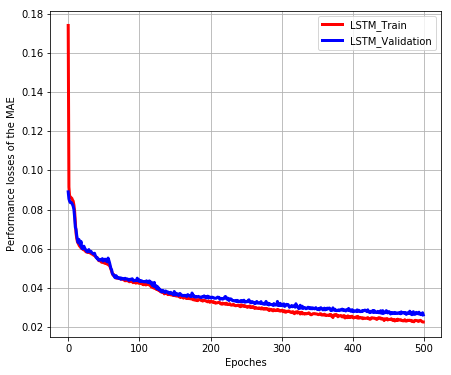

In [32]:
plt.figure(figsize = (7,6))
plt.plot(hist2.history['loss'],'r-',linewidth=3)
plt.plot(hist2.history['val_loss'],'B',linewidth=3)
plt.xlabel('Epoches')
plt.ylabel('Performance losses of the MAE')
plt.legend(['LSTM_Train', 'LSTM_Validation'], loc='upper right')
plt.grid(True)
plt.savefig('LSTMTrackReducedupdate.png', format='png', dpi=1200)
plt.show()

In [33]:
#import or read the datasets
pred = pd.read_csv('TestingTrackDataAllReducedupdated.csv',index_col=0)
pred=pred.drop(pred.columns[pred.columns.str.contains('unnamed',case = False)],axis = 1)
pred.head()

,UserCode,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9,...,CH1,CH2,CH3,CH4,CH5,RSSU1,RSSU2,RSSU3,X,Y
0,101,-4.170390,-3.325302,1.935056,0.455646,0.529686,-0.318855,0.894483,-0.377338,0.002535,...,7,7,157,1,7,-49.5,-71.5,-72.5,191,1
1,101,-2.264452,0.020588,1.284345,0.242016,0.098174,-0.717960,0.261262,-0.143738,0.156876,...,1,149,149,149,149,-53.5,-81.3,-79.3,134,1
2,101,-2.658827,-2.821510,0.621955,-0.568167,0.025068,-0.047774,1.015126,-0.196741,0.176063,...,157,157,1,1,1,-62.9,-81.1,-79.1,89,1
3,101,-7.978411,0.708593,0.281855,-1.204837,-0.614710,-0.512645,0.770786,-0.239415,0.002249,...,1,11,11,11,11,-71.9,-77.3,-77.3,17,1
4,101,-9.991847,-0.147214,0.816606,-0.219573,0.267080,-0.526128,-0.603417,0.262651,0.087432,...,1,1,1,6,6,-76.4,-84.2,-77.2,1,114


In [34]:
X_pred=pred.iloc[:,:-2]
Y_pred=pred.iloc[:,-2:]
x_pred, y_pred = X_pred.values, Y_pred.values  

# scaling values for model
x_pred_scale = MinMaxScaler()
y_pred_scale = MinMaxScaler() 

Xx__pred = x_pred_scale.fit_transform(x_pred)
Yy_pred = y_pred_scale.fit_transform(y_pred) 

C:\Users\Abebe Belay\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.



In [35]:
pred_x = np.reshape(Xx__pred, (Xx__pred.shape[0], 1, Xx__pred.shape[1])) 
pred_x.shape

(101, 1, 39)

In [36]:
#Getting the detected central wavelength of FBGs 
from timeit import default_timer as timer
start2 = timer()
pred_LSTM=model2.predict(pred_x)
duration2 = timer() - start2
print('The computational time of LSTM model is:-', duration2)

predictions_trans1=y_scale.inverse_transform(pred_LSTM)

The computational time of LSTM model is:- 1.2347545860187665


In [37]:
#Performance Evaluations
print("RMSE:", sqrt(mean_squared_error(pred_LSTM,Yy_pred)))
print("MAE:", mean_absolute_error(pred_LSTM,Yy_pred))

RMSE: 0.19455156281352567
MAE: 0.12715672265372108


In [38]:
#This is to write the CSV file as output values
np.savetxt("LSTM_test_predictionreducedupdate.csv", predictions_trans1, delimiter = ",")

In [39]:
#-----------------------------GRU--------------------------------

In [58]:
def gru(feature):
    input_shapes=(None, feature)
    
    print(input_shapes)
    model_name3 = 'Tracking_GRU_' 
    model3='gru'
    model3 = Sequential()
    model3.add(GRU(units=512, return_sequences=True, input_shape=input_shapes))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256,return_sequences=True))
    model3.add(Dropout(0.20))
    model3.add(GRU(units=256))
    model3.add(Dropout(0.20))
    model3.add(Dense(2, activation='tanh'))
    #model.add(Dense(4, activation='relu'))
    #model.add(Dense(4, activation='softmax'))
    model3.compile(loss='MSE', optimizer='adamax', metrics=['accuracy']) 
    #model.compile(loss='mse',optimizer='rmsprop')
    #model.compile(loss='mse', optimizer='sgd') 
    return model3

In [59]:
model3=gru(X_train.shape[2])
model3.summary()

(None, 39)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, None, 512)         847872    
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 512)         0         
_________________________________________________________________
gru_14 (GRU)                 (None, None, 256)         590592    
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_15 (GRU)                 (None, None, 256)         393984    
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 256)         0         
_________________________________________________________________
gru_16 (GRU)                 (None, None, 256)         393984    

In [60]:
##Fitting the GRU to the Training set
hist3=model3.fit(X_train, y_train, batch_size=300, epochs=500, validation_split=0.05, verbose=1)

Train on 7329 samples, validate on 386 samples
Epoch 1/500
7329/7329 [==============================] - 15s 2ms/step - loss: 0.1149 - acc: 0.7383 - val_loss: 0.0726 - val_acc: 0.8472
Epoch 2/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0860 - acc: 0.7504 - val_loss: 0.0629 - val_acc: 0.8472
Epoch 3/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0784 - acc: 0.7498 - val_loss: 0.0605 - val_acc: 0.8472
Epoch 4/500
7329/7329 [==============================] - 7s 996us/step - loss: 0.0664 - acc: 0.7159 - val_loss: 0.0645 - val_acc: 0.8083
Epoch 5/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0620 - acc: 0.7136 - val_loss: 0.0646 - val_acc: 0.8212
Epoch 6/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0620 - acc: 0.7304 - val_loss: 0.0536 - val_acc: 0.8472
Epoch 7/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0596 - acc: 0.7390 - val_loss: 0.0545 - val_acc: 0.8446
Epoch

Epoch 61/500
7329/7329 [==============================] - 9s 1ms/step - loss: 0.0360 - acc: 0.8820 - val_loss: 0.0428 - val_acc: 0.8912
Epoch 62/500
7329/7329 [==============================] - 9s 1ms/step - loss: 0.0377 - acc: 0.8761 - val_loss: 0.0431 - val_acc: 0.8990
Epoch 63/500
7329/7329 [==============================] - 9s 1ms/step - loss: 0.0363 - acc: 0.8798 - val_loss: 0.0374 - val_acc: 0.9119
Epoch 64/500
7329/7329 [==============================] - 9s 1ms/step - loss: 0.0358 - acc: 0.8828 - val_loss: 0.0360 - val_acc: 0.9016
Epoch 65/500
7329/7329 [==============================] - 9s 1ms/step - loss: 0.0363 - acc: 0.8827 - val_loss: 0.0375 - val_acc: 0.8964
Epoch 66/500
7329/7329 [==============================] - 10s 1ms/step - loss: 0.0362 - acc: 0.8833 - val_loss: 0.0406 - val_acc: 0.9119
Epoch 67/500
7329/7329 [==============================] - 10s 1ms/step - loss: 0.0353 - acc: 0.8846 - val_loss: 0.0400 - val_acc: 0.9016
Epoch 68/500
7329/7329 [======================

7329/7329 [==============================] - 8s 1ms/step - loss: 0.0278 - acc: 0.9188 - val_loss: 0.0339 - val_acc: 0.9430
Epoch 122/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0282 - acc: 0.9127 - val_loss: 0.0309 - val_acc: 0.9404
Epoch 123/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0275 - acc: 0.9194 - val_loss: 0.0308 - val_acc: 0.9508
Epoch 124/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0278 - acc: 0.9161 - val_loss: 0.0315 - val_acc: 0.9404
Epoch 125/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0269 - acc: 0.9180 - val_loss: 0.0372 - val_acc: 0.9067
Epoch 126/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0280 - acc: 0.9147 - val_loss: 0.0355 - val_acc: 0.9249
Epoch 127/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0280 - acc: 0.9164 - val_loss: 0.0334 - val_acc: 0.9275
Epoch 128/500
7329/7329 [==============================

7329/7329 [==============================] - 7s 982us/step - loss: 0.0218 - acc: 0.9346 - val_loss: 0.0349 - val_acc: 0.9249
Epoch 181/500
7329/7329 [==============================] - 7s 984us/step - loss: 0.0222 - acc: 0.9329 - val_loss: 0.0337 - val_acc: 0.9301
Epoch 182/500
7329/7329 [==============================] - 7s 997us/step - loss: 0.0220 - acc: 0.9344 - val_loss: 0.0322 - val_acc: 0.9352
Epoch 183/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0222 - acc: 0.9330 - val_loss: 0.0306 - val_acc: 0.9404
Epoch 184/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0228 - acc: 0.9285 - val_loss: 0.0318 - val_acc: 0.9404
Epoch 185/500
7329/7329 [==============================] - 7s 987us/step - loss: 0.0224 - acc: 0.9297 - val_loss: 0.0314 - val_acc: 0.9404
Epoch 186/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0220 - acc: 0.9366 - val_loss: 0.0329 - val_acc: 0.9404
Epoch 187/500
7329/7329 [======================

7329/7329 [==============================] - 7s 981us/step - loss: 0.0170 - acc: 0.9476 - val_loss: 0.0289 - val_acc: 0.9430
Epoch 240/500
7329/7329 [==============================] - 7s 997us/step - loss: 0.0172 - acc: 0.9454 - val_loss: 0.0295 - val_acc: 0.9404
Epoch 241/500
7329/7329 [==============================] - 7s 967us/step - loss: 0.0171 - acc: 0.9482 - val_loss: 0.0303 - val_acc: 0.9352
Epoch 242/500
7329/7329 [==============================] - 7s 974us/step - loss: 0.0168 - acc: 0.9487 - val_loss: 0.0268 - val_acc: 0.9456
Epoch 243/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0173 - acc: 0.9476 - val_loss: 0.0294 - val_acc: 0.9378
Epoch 244/500
7329/7329 [==============================] - 7s 968us/step - loss: 0.0161 - acc: 0.9497 - val_loss: 0.0327 - val_acc: 0.9249
Epoch 245/500
7329/7329 [==============================] - 7s 964us/step - loss: 0.0170 - acc: 0.9464 - val_loss: 0.0300 - val_acc: 0.9275
Epoch 246/500
7329/7329 [==================

7329/7329 [==============================] - 8s 1ms/step - loss: 0.0131 - acc: 0.9572 - val_loss: 0.0278 - val_acc: 0.9378
Epoch 299/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0129 - acc: 0.9610 - val_loss: 0.0294 - val_acc: 0.9223
Epoch 300/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0127 - acc: 0.9565 - val_loss: 0.0278 - val_acc: 0.9352
Epoch 301/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0131 - acc: 0.9548 - val_loss: 0.0305 - val_acc: 0.9249
Epoch 302/500
7329/7329 [==============================] - 7s 996us/step - loss: 0.0131 - acc: 0.9569 - val_loss: 0.0317 - val_acc: 0.9249
Epoch 303/500
7329/7329 [==============================] - 7s 983us/step - loss: 0.0126 - acc: 0.9559 - val_loss: 0.0340 - val_acc: 0.9171
Epoch 304/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0124 - acc: 0.9585 - val_loss: 0.0293 - val_acc: 0.9326
Epoch 305/500
7329/7329 [==========================

7329/7329 [==============================] - 8s 1ms/step - loss: 0.0100 - acc: 0.9634 - val_loss: 0.0317 - val_acc: 0.9171
Epoch 358/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0102 - acc: 0.9641 - val_loss: 0.0284 - val_acc: 0.9275
Epoch 359/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0106 - acc: 0.9614 - val_loss: 0.0298 - val_acc: 0.9249
Epoch 360/500
7329/7329 [==============================] - 7s 990us/step - loss: 0.0107 - acc: 0.9632 - val_loss: 0.0254 - val_acc: 0.9352
Epoch 361/500
7329/7329 [==============================] - 7s 989us/step - loss: 0.0101 - acc: 0.9630 - val_loss: 0.0262 - val_acc: 0.9404
Epoch 362/500
7329/7329 [==============================] - 7s 999us/step - loss: 0.0100 - acc: 0.9614 - val_loss: 0.0330 - val_acc: 0.9119
Epoch 363/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0106 - acc: 0.9600 - val_loss: 0.0236 - val_acc: 0.9430
Epoch 364/500
7329/7329 [========================

7329/7329 [==============================] - 7s 1ms/step - loss: 0.0083 - acc: 0.9685 - val_loss: 0.0231 - val_acc: 0.9482
Epoch 417/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0085 - acc: 0.9666 - val_loss: 0.0300 - val_acc: 0.9223
Epoch 418/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0086 - acc: 0.9678 - val_loss: 0.0298 - val_acc: 0.9275
Epoch 419/500
7329/7329 [==============================] - 7s 984us/step - loss: 0.0087 - acc: 0.9709 - val_loss: 0.0255 - val_acc: 0.9430
Epoch 420/500
7329/7329 [==============================] - 7s 977us/step - loss: 0.0084 - acc: 0.9667 - val_loss: 0.0292 - val_acc: 0.9223
Epoch 421/500
7329/7329 [==============================] - 7s 990us/step - loss: 0.0081 - acc: 0.9653 - val_loss: 0.0272 - val_acc: 0.9326
Epoch 422/500
7329/7329 [==============================] - 7s 998us/step - loss: 0.0082 - acc: 0.9662 - val_loss: 0.0229 - val_acc: 0.9456
Epoch 423/500
7329/7329 [======================

7329/7329 [==============================] - 7s 1ms/step - loss: 0.0067 - acc: 0.9688 - val_loss: 0.0240 - val_acc: 0.9430
Epoch 476/500
7329/7329 [==============================] - 7s 984us/step - loss: 0.0068 - acc: 0.9704 - val_loss: 0.0242 - val_acc: 0.9456
Epoch 477/500
7329/7329 [==============================] - 7s 996us/step - loss: 0.0065 - acc: 0.9713 - val_loss: 0.0256 - val_acc: 0.9404
Epoch 478/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0064 - acc: 0.9689 - val_loss: 0.0232 - val_acc: 0.9482
Epoch 479/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0069 - acc: 0.9700 - val_loss: 0.0259 - val_acc: 0.9275
Epoch 480/500
7329/7329 [==============================] - 7s 1ms/step - loss: 0.0067 - acc: 0.9700 - val_loss: 0.0237 - val_acc: 0.9430
Epoch 481/500
7329/7329 [==============================] - 8s 1ms/step - loss: 0.0060 - acc: 0.9705 - val_loss: 0.0255 - val_acc: 0.9378
Epoch 482/500
7329/7329 [==========================

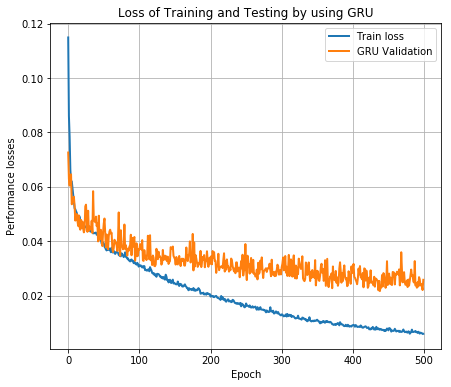

In [61]:
plt.figure(figsize=(7,6))
plt.plot(hist3.history['loss'],linewidth=2)
plt.plot(hist3.history['val_loss'],linewidth=2)
plt.title("Loss of Training and Testing by using GRU")
plt.ylabel('Performance losses')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'GRU Validation'], loc='upper right')
plt.grid(True)
plt.savefig('GRUTrackReducedupdate.png', format='png', dpi=1200)
plt.show()

In [62]:
#Getting the predicted locations 
from timeit import default_timer as timer
start3 = timer()
pred_gru=model3.predict(pred_x)
duration3 = timer() - start3
print('The computational time of GRU model is :-', duration3)

predictions_trans2=y_scale.inverse_transform(pred_gru)

The computational time of GRU model is :- 2.4173304877549526


In [63]:
#Performance Evaluations
print("RMSE:", sqrt(mean_squared_error(pred_gru,Yy_pred)))
print("MAE:", mean_absolute_error(pred_gru,Yy_pred))

RMSE: 0.19286555314778886
MAE: 0.1160197768972332


In [64]:
#This is to write the CSV file as output values
np.savetxt("GRU_test_predictionreducedupdate.csv", predictions_trans2, delimiter = ",")

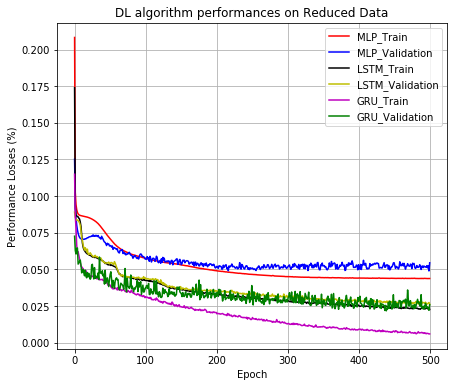

In [65]:
#Loss graph 
plt.figure(figsize=(7,6))
plt.plot(hist1.history['loss'], 'r-', linewidth=1.5)
plt.plot(hist1.history['val_loss'],'B', linewidth=1.5)


plt.plot(hist2.history['loss'],'k', linewidth=1.5)
plt.plot(hist2.history['val_loss'],'y', linewidth=1.5)


plt.plot(hist3.history['loss'],'m', linewidth=1.5)
plt.plot(hist3.history['val_loss'],'g', linewidth=1.5)


plt.title("DL algorithm performances on Reduced Data")
plt.ylabel('Performance Losses (%)')
plt.xlabel('Epoch')
plt.legend(['MLP_Train', 'MLP_Validation', 'LSTM_Train', 'LSTM_Validation', 'GRU_Train', 'GRU_Validation'], loc='upper right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Tracklossupdate.png', format='png', dpi=1200)
plt.show()

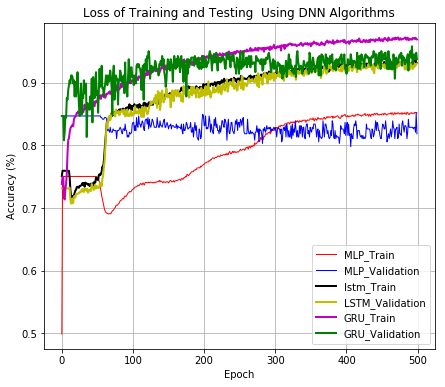

In [66]:
#Performance Graph
plt.figure(figsize=(7,6))
plt.plot(hist1.history['acc'], 'r-', linewidth=1)
plt.plot(hist1.history['val_acc'],'B', linewidth=1)


plt.plot(hist2.history['acc'],'k', linewidth=2)
plt.plot(hist2.history['val_acc'],'y', linewidth=2)


plt.plot(hist3.history['acc'],'m', linewidth=2)
plt.plot(hist3.history['val_acc'],'g', linewidth=2)


plt.title("Loss of Training and Testing  Using DNN Algorithms")
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['MLP_Train', 'MLP_Validation', 'lstm_Train', 'LSTM_Validation', 'GRU_Train', 'GRU_Validation'], loc='lower right')
plt.grid(True)
plt.savefig('MLP_LSTM_GRU_Track.png', format='png', dpi=1200)
plt.show()